## Explore data_galton.csv dataset
- cross table,
- Visualize Parent height and Child height
- build linear regression model for this dataset

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('data_galton.csv')
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


<Axes: xlabel='child', ylabel='parent'>

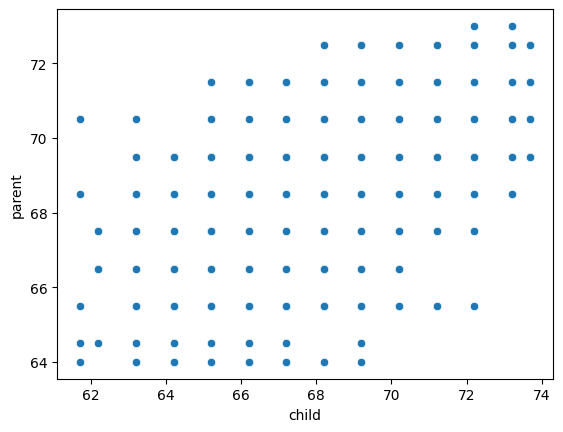

In [60]:
sns.scatterplot(x=df.child, y=df.parent)

In [61]:
df['child'].corr(df['parent'])

0.4587623682928229

In [62]:
df_1 = df.groupby(['child']).mean().reset_index()
df_1.head()

,child,parent
0,61.7,66.600000
1,62.2,66.642857
2,63.2,66.625000
3,64.2,67.533898
4,65.2,67.677083


<Axes: xlabel='child', ylabel='parent'>

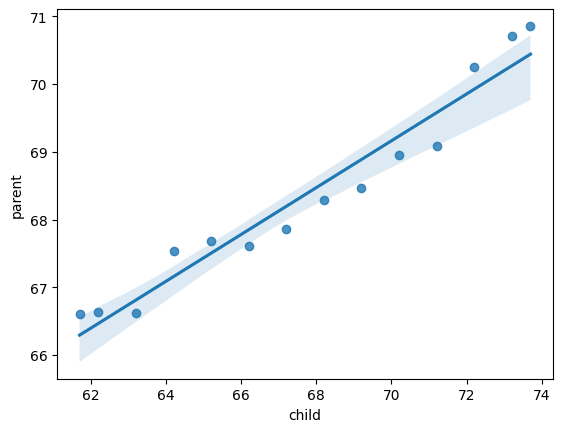

In [63]:
sns.regplot(x=df_1.child, y=df_1.parent)

In [64]:
cross_tab = pd.crosstab(df['child'], df['parent'])
cross_tab

parent,64.0,64.5,65.5,66.5,67.5,68.5,69.5,70.5,71.5,72.5,73.0
child,,,,,,,,,,,
61.7,1,1,1,0,0,1,0,1,0,0,0
62.2,0,1,0,3,3,0,0,0,0,0,0
63.2,2,4,9,3,5,7,1,1,0,0,0
64.2,4,4,5,5,14,11,16,0,0,0,0
65.2,1,1,7,2,15,16,4,1,1,0,0
66.2,2,5,11,17,36,25,17,1,3,0,0
67.2,2,5,11,17,38,31,27,3,4,0,0
68.2,1,0,7,14,28,34,20,12,3,1,0
69.2,1,2,7,13,38,48,33,18,5,2,0


<Axes: xlabel='parent', ylabel='child'>

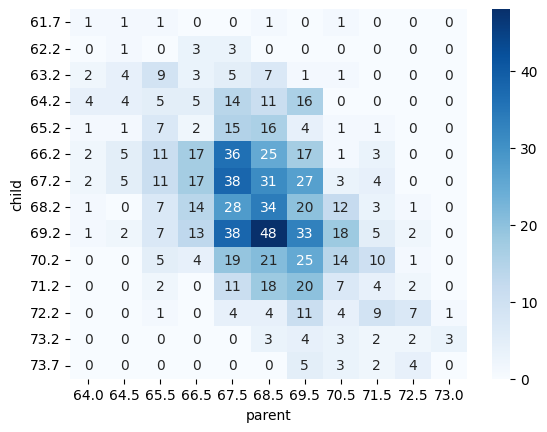

In [65]:
sns.heatmap(cross_tab, cmap='Blues', annot=True)

## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df_1[['child']], df_1.parent, test_size=0.2)

In [68]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [69]:
reg.score(X_test, y_test)

0.06377041106485437